## Sentiment Analysis using NLP for Yelp Phoenix Data

In [2]:
import pandas as pd
import numpy as np
from nltk.tokenize import word_tokenize
from nltk import pos_tag
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from sklearn.preprocessing import LabelEncoder
from collections import defaultdict
from nltk.corpus import wordnet as wn
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn import model_selection, naive_bayes, svm
import seaborn as sn  
import re  
from textblob import TextBlob 

In [4]:
# import packages
import matplotlib
import matplotlib.pyplot as plt
import statsmodels.formula.api as smf
from sklearn.metrics import mean_squared_error, r2_score
import datetime as dt
from sklearn import linear_model
from sklearn import model_selection
from sklearn import preprocessing
from sklearn.metrics import silhouette_samples, silhouette_score
from sklearn.cluster import KMeans

In [3]:
# suppress warning
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

#### Reading the files in dataframes. We will be focusing majorly on reviews (of Phoenix Yelp Reviews) dataframe

In [3]:
review = pd.read_csv("Yelp_Reviwes_Phoenix_Food.csv")
review.head()

,Unnamed: 0,review_id,user_id,business_id,stars,date,text,useful,funny,cool
0,93,BF0ANB54sc_f-3_howQBCg,ssuXFjkH4neiBgwv-oN4IA,JlNeaOymdVbE6_bubqjohg,1,2014-08-09,We always go to the chevo's in chandler which ...,3,0,0
1,355,z_mVLygzPn8uHp63SSCErw,MzEnYCyZlRYQRISNMXTWIg,S-oLPRdhlyL5HAknBKTUcQ,4,2017-11-30,Holy portion sizes! You get a lot of bang for ...,0,0,0
2,357,xatycgntu_F_Ioyny3iflw,vaXJ7-xLrnD6FAEhUqYKwQ,iIjVO7cLD1UEmIO7G05Ujw,4,2016-06-11,Flavor was actually pretty good. Not used to e...,0,0,0
3,358,Z7U7MMef6Tbj_ZbSFzLRUw,vaXJ7-xLrnD6FAEhUqYKwQ,1JF9TbJ2d5hH8xsQvvklHg,5,2016-06-18,This is place very great flavor. Server was on...,1,0,0
4,360,CKiZvHfvVOY-NrFy_lT-TA,lUQzbz84E30c4L-JbqE3FQ,Ap17p-tA4Ipzy1s35DfCfg,5,2016-10-22,Had the BEST time here with my husband celebra...,0,0,1


In [4]:
business_yelp = pd.read_csv("yelp_business.csv")
business_yelp.head()

,business_id,name,neighborhood,address,city,state,postal_code,latitude,longitude,stars,review_count,is_open,categories
0,FYWN1wneV18bWNgQjJ2GNg,"""Dental by Design""",NaN,"""4855 E Warner Rd, Ste B9""",Ahwatukee,AZ,85044,33.330690,-111.978599,4.0,22,1,Dentists;General Dentistry;Health & Medical;Or...
1,He-G7vWjzVUysIKrfNbPUQ,"""Stephen Szabo Salon""",NaN,"""3101 Washington Rd""",McMurray,PA,15317,40.291685,-80.104900,3.0,11,1,Hair Stylists;Hair Salons;Men's Hair Salons;Bl...
2,KQPW8lFf1y5BT2MxiSZ3QA,"""Western Motor Vehicle""",NaN,"""6025 N 27th Ave, Ste 1""",Phoenix,AZ,85017,33.524903,-112.115310,1.5,18,1,Departments of Motor Vehicles;Public Services ...
3,8DShNS-LuFqpEWIp0HxijA,"""Sports Authority""",NaN,"""5000 Arizona Mills Cr, Ste 435""",Tempe,AZ,85282,33.383147,-111.964725,3.0,9,0,Sporting Goods;Shopping
4,PfOCPjBrlQAnz__NXj9h_w,"""Brick House Tavern + Tap""",NaN,"""581 Howe Ave""",Cuyahoga Falls,OH,44221,41.119535,-81.475690,3.5,116,1,American (New);Nightlife;Bars;Sandwiches;Ameri...


In [5]:
tip_yelp = pd.read_csv("yelp_tip.csv")
tip_yelp.head()

,text,date,likes,business_id,user_id
0,Great breakfast large portions and friendly wa...,2015-08-12,0,jH19V2I9fIslnNhDzPmdkA,ZcLKXikTHYOnYt5VYRO5sg
1,Nice place. Great staff. A fixture in the tow...,2014-06-20,0,dAa0hB2yrnHzVmsCkN4YvQ,oaYhjqBbh18ZhU0bpyzSuw
2,Happy hour 5-7 Monday - Friday,2016-10-12,0,dAa0hB2yrnHzVmsCkN4YvQ,ulQ8Nyj7jCUR8M83SUMoRQ
3,"Parking is a premium, keep circling, you will ...",2017-01-28,0,ESzO3Av0b1_TzKOiqzbQYQ,ulQ8Nyj7jCUR8M83SUMoRQ
4,Homemade pasta is the best in the area,2017-02-25,0,k7WRPbDd7rztjHcGGkEjlw,ulQ8Nyj7jCUR8M83SUMoRQ


In [8]:
business_phoenix=business_yelp[business_yelp['city']=='Phoenix']

In [9]:
business_phoenix.head()

,business_id,name,neighborhood,address,city,state,postal_code,latitude,longitude,stars,review_count,is_open,categories
2,KQPW8lFf1y5BT2MxiSZ3QA,"""Western Motor Vehicle""",NaN,"""6025 N 27th Ave, Ste 1""",Phoenix,AZ,85017,33.524903,-112.115310,1.5,18,1,Departments of Motor Vehicles;Public Services ...
22,7YIy1tXOor9VCwvaSjuBHg,"""TSA Checkpoint T-4 A - Phoenix Sky Harbor Int...",NaN,"""3400 E Sky Harbor Blvd""",Phoenix,AZ,85034,33.435463,-112.006989,1.5,46,1,Public Services & Government
31,zzMu-6SmqhpvHxVRM6tx9g,"""Good Brakes Automotive""",NaN,"""12614 N Cave Creek Rd, Ste 104""",Phoenix,AZ,85022,33.600877,-112.037685,4.0,5,1,Oil Change Stations;Smog Check Stations;Automo...
36,ok38fApaT1TBEU-IH85BvA,"""Kool Pool Care & Repair""",NaN,"""3245 W Florimond Rd""",Phoenix,AZ,85086,33.803900,-112.130405,5.0,5,1,Home Services;Contractors;Pool & Hot Tub Servi...
45,rDMptJYWtnMhpQu_rRXHng,"""McDonald's""",NaN,"""719 E Thunderbird Rd""",Phoenix,AZ,85022,33.607070,-112.064382,1.0,10,1,Fast Food;Burgers;Restaurants


In [10]:
business_phoenix=business_phoenix.reset_index(drop=True)

#### Data Cleaning

In [11]:
import re
business_phoenix['restaurant']=business_phoenix['categories'].str.contains('Restaurants',flags=re.IGNORECASE)

In [12]:
business_phoenix_restaurant=business_phoenix[business_phoenix['restaurant']==True]
business_phoenix_restaurant

,business_id,name,neighborhood,address,city,state,postal_code,latitude,longitude,stars,review_count,is_open,categories,restaurant
4,rDMptJYWtnMhpQu_rRXHng,"""McDonald's""",NaN,"""719 E Thunderbird Rd""",Phoenix,AZ,85022,33.607070,-112.064382,1.0,10,1,Fast Food;Burgers;Restaurants,True
5,1WBkAuQg81kokZIPMpn9Zg,"""Charr An American Burger Bar""",NaN,"""777 E Thunderbird Rd, Ste 107""",Phoenix,AZ,85022,33.607310,-112.063404,3.0,232,1,Burgers;Restaurants,True
7,iPa__LOhse-hobC2Xmp-Kw,"""McDonald's""",NaN,"""1635 E Camelback Rd""",Phoenix,AZ,85016,33.508765,-112.046240,3.0,34,1,Restaurants;Burgers;Fast Food,True
9,YhV93k9uiMdr3FlV4FHjwA,"""Caviness Studio""",NaN,"""""",Phoenix,AZ,85001,33.449967,-112.070223,5.0,4,1,Marketing;Men's Clothing;Restaurants;Graphic D...,True
11,QkG3KUXwqZBW18A9k1xqCA,"""Red Lobster""",NaN,"""2810 North 75th Ave""",Phoenix,AZ,85035,33.478735,-112.221379,2.5,37,1,American (Traditional);Restaurants;Seafood,True
12,5XejqzaFmtkZMstJS5Iy-w,"""D'Lish Cafe""",NaN,"""503 W Thomas Rd""",Phoenix,AZ,85013,33.480301,-112.080586,4.0,37,0,Vegan;American (New);Restaurants;Sandwiches;Sa...,True
15,2v-8QQfMLX2PCz-0S6gISQ,"""Papa John's Pizza""",NaN,"""3441 W Northern Ave""",Phoenix,AZ,85051,33.552870,-112.133712,2.5,7,1,Pizza;Restaurants;Fast Food,True
16,M3uV9Y3EDSpy9d4YwyNSAQ,"""Yakiramen""",NaN,"""10605 N 43rd Ave""",Phoenix,AZ,85029,33.582363,-112.149884,4.0,66,1,Nightlife;Japanese;Music Venues;Ramen;Arts & E...,True
28,U1ZVgF-kfkvv_rcoe0RglQ,"""Pho Noodles""",NaN,"""3417 N 7th Ave""",Phoenix,AZ,85013,33.488760,-112.082402,4.5,172,1,Restaurants;Noodles;Vietnamese,True
29,FfI9FOaQqzUxixw6_glt3Q,"""Affinito's Bistro""",NaN,"""3655 W Anthem Way, Ste C-137""",Phoenix,AZ,85086,33.864964,-112.138820,3.0,6,0,Restaurants;Italian,True


In [13]:
bpr2=business_phoenix_restaurant.copy()

In [14]:
bpr2 = bpr2['categories'].str.split(';', expand=True)

In [15]:
bpr2.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15
4,Fast Food,Burgers,Restaurants,None,None,None,None,None,None,None,None,None,None,None,None,None
5,Burgers,Restaurants,None,None,None,None,None,None,None,None,None,None,None,None,None,None
7,Restaurants,Burgers,Fast Food,None,None,None,None,None,None,None,None,None,None,None,None,None
9,Marketing,Men's Clothing,Restaurants,Graphic Design,Women's Clothing,Screen Printing,Advertising,Pizza,Shopping,Web Design,Fashion,Local Services,Screen Printing/T-Shirt Printing,Professional Services,None,None
11,American (Traditional),Restaurants,Seafood,None,None,None,None,None,None,None,None,None,None,None,None,None


In [16]:
cat=bpr2.iloc[:,:]
cat.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15
4,Fast Food,Burgers,Restaurants,None,None,None,None,None,None,None,None,None,None,None,None,None
5,Burgers,Restaurants,None,None,None,None,None,None,None,None,None,None,None,None,None,None
7,Restaurants,Burgers,Fast Food,None,None,None,None,None,None,None,None,None,None,None,None,None
9,Marketing,Men's Clothing,Restaurants,Graphic Design,Women's Clothing,Screen Printing,Advertising,Pizza,Shopping,Web Design,Fashion,Local Services,Screen Printing/T-Shirt Printing,Professional Services,None,None
11,American (Traditional),Restaurants,Seafood,None,None,None,None,None,None,None,None,None,None,None,None,None


In [18]:
business_phoenix_restaurant=pd.concat([business_phoenix_restaurant,cat], axis=1)
business_phoenix_restaurant.head()

,business_id,name,neighborhood,address,city,state,postal_code,latitude,longitude,stars,...,6,7,8,9,10,11,12,13,14,15
4,rDMptJYWtnMhpQu_rRXHng,"""McDonald's""",NaN,"""719 E Thunderbird Rd""",Phoenix,AZ,85022,33.607070,-112.064382,1.0,...,None,None,None,None,None,None,None,None,None,None
5,1WBkAuQg81kokZIPMpn9Zg,"""Charr An American Burger Bar""",NaN,"""777 E Thunderbird Rd, Ste 107""",Phoenix,AZ,85022,33.607310,-112.063404,3.0,...,None,None,None,None,None,None,None,None,None,None
7,iPa__LOhse-hobC2Xmp-Kw,"""McDonald's""",NaN,"""1635 E Camelback Rd""",Phoenix,AZ,85016,33.508765,-112.046240,3.0,...,None,None,None,None,None,None,None,None,None,None
9,YhV93k9uiMdr3FlV4FHjwA,"""Caviness Studio""",NaN,"""""",Phoenix,AZ,85001,33.449967,-112.070223,5.0,...,Advertising,Pizza,Shopping,Web Design,Fashion,Local Services,Screen Printing/T-Shirt Printing,Professional Services,None,None
11,QkG3KUXwqZBW18A9k1xqCA,"""Red Lobster""",NaN,"""2810 North 75th Ave""",Phoenix,AZ,85035,33.478735,-112.221379,2.5,...,None,None,None,None,None,None,None,None,None,None


In [19]:
business_phoenix_restaurant = business_phoenix_restaurant.applymap(str)

In [21]:
from sklearn.preprocessing import LabelEncoder  
le = LabelEncoder() 

In [22]:
for i in range(0,15):
    business_phoenix_restaurant[i]= le.fit_transform(business_phoenix_restaurant[i]) 

In [23]:
business_phoenix_restaurant.head()

,business_id,name,neighborhood,address,city,state,postal_code,latitude,longitude,stars,...,6,7,8,9,10,11,12,13,14,15
4,rDMptJYWtnMhpQu_rRXHng,"""McDonald's""",nan,"""719 E Thunderbird Rd""",Phoenix,AZ,85022,33.6070702,-112.0643825,1.0,...,70,60,41,23,16,11,4,4,2,None
5,1WBkAuQg81kokZIPMpn9Zg,"""Charr An American Burger Bar""",nan,"""777 E Thunderbird Rd, Ste 107""",Phoenix,AZ,85022,33.60731,-112.063404,3.0,...,70,60,41,23,16,11,4,4,2,None
7,iPa__LOhse-hobC2Xmp-Kw,"""McDonald's""",nan,"""1635 E Camelback Rd""",Phoenix,AZ,85016,33.5087649,-112.04624,3.0,...,70,60,41,23,16,11,4,4,2,None
9,YhV93k9uiMdr3FlV4FHjwA,"""Caviness Studio""",nan,"""""",Phoenix,AZ,85001,33.4499672,-112.0702225,5.0,...,1,62,49,36,8,9,7,5,2,None
11,QkG3KUXwqZBW18A9k1xqCA,"""Red Lobster""",nan,"""2810 North 75th Ave""",Phoenix,AZ,85035,33.4787353,-112.2213794,2.5,...,70,60,41,23,16,11,4,4,2,None


In [24]:
pd.options.display.max_colwidth = 60

plt.rcParams['figure.figsize'] = (8, 6)
plt.rcParams['legend.fontsize'] = 'x-large'
plt.rcParams['axes.labelsize'] = 'x-large'
plt.rcParams['axes.titlesize'] = 'x-large'
plt.rcParams['xtick.labelsize'] = 'x-large'
plt.rcParams['ytick.labelsize'] = 'x-large'

sn.set_style('darkgrid')
sn.set_context('notebook', font_scale=1.5)

In [25]:
text1=review['text']
df=pd.DataFrame(text1)

In [26]:
df1=df.head()

In [27]:
df1['word_count']= df1['text'].apply(lambda x: len(x.split()))
df1.head()

/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


,text,word_count
0,We always go to the chevo's in chandler which is delicio...,78
1,Holy portion sizes! You get a lot of bang for your buck ...,25
2,Flavor was actually pretty good. Not used to eating menu...,60
3,This is place very great flavor. Server was on top of th...,93
4,Had the BEST time here with my husband celebrating our a...,43


In [28]:
df1['char_count']= df1['text'].apply(lambda x: len(x))

/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [29]:
def average_word(x):
    words=x.split()
    return sum(len(word) for word in words)/len(words)

In [30]:
df1['average_char_count']=df1['text'].apply(lambda x:average_word(x))

/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [31]:
df1.head()

,text,word_count,char_count,average_char_count
0,We always go to the chevo's in chandler which is delicio...,78,424,4
1,Holy portion sizes! You get a lot of bang for your buck ...,25,130,4
2,Flavor was actually pretty good. Not used to eating menu...,60,310,4
3,This is place very great flavor. Server was on top of th...,93,476,4
4,Had the BEST time here with my husband celebrating our a...,43,257,5


In [32]:
from nltk.corpus import stopwords
stop_words=stopwords.words('english')
stop_words

[u'i',
 u'me',
 u'my',
 u'myself',
 u'we',
 u'our',
 u'ours',
 u'ourselves',
 u'you',
 u"you're",
 u"you've",
 u"you'll",
 u"you'd",
 u'your',
 u'yours',
 u'yourself',
 u'yourselves',
 u'he',
 u'him',
 u'his',
 u'himself',
 u'she',
 u"she's",
 u'her',
 u'hers',
 u'herself',
 u'it',
 u"it's",
 u'its',
 u'itself',
 u'they',
 u'them',
 u'their',
 u'theirs',
 u'themselves',
 u'what',
 u'which',
 u'who',
 u'whom',
 u'this',
 u'that',
 u"that'll",
 u'these',
 u'those',
 u'am',
 u'is',
 u'are',
 u'was',
 u'were',
 u'be',
 u'been',
 u'being',
 u'have',
 u'has',
 u'had',
 u'having',
 u'do',
 u'does',
 u'did',
 u'doing',
 u'a',
 u'an',
 u'the',
 u'and',
 u'but',
 u'if',
 u'or',
 u'because',
 u'as',
 u'until',
 u'while',
 u'of',
 u'at',
 u'by',
 u'for',
 u'with',
 u'about',
 u'against',
 u'between',
 u'into',
 u'through',
 u'during',
 u'before',
 u'after',
 u'above',
 u'below',
 u'to',
 u'from',
 u'up',
 u'down',
 u'in',
 u'out',
 u'on',
 u'off',
 u'over',
 u'under',
 u'again',
 u'further',
 u'th

In [33]:
len(stop_words)

179

In [34]:
df1['stop_words_count']=df1['text'].apply(lambda x:len([word for word in x.split() if word.lower() in stop_words]))
df1.head()

/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


,text,word_count,char_count,average_char_count,stop_words_count
0,We always go to the chevo's in chandler which is delicio...,78,424,4,33
1,Holy portion sizes! You get a lot of bang for your buck ...,25,130,4,10
2,Flavor was actually pretty good. Not used to eating menu...,60,310,4,32
3,This is place very great flavor. Server was on top of th...,93,476,4,45
4,Had the BEST time here with my husband celebrating our a...,43,257,5,18


In [35]:
df1['stopword_rate']=df1['stop_words_count']/df1['word_count']

/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [36]:
df1.sort_values(by='stopword_rate')

,text,word_count,char_count,average_char_count,stop_words_count,stopword_rate
1,Holy portion sizes! You get a lot of bang for your buck ...,25,130,4,10,0.400000
4,Had the BEST time here with my husband celebrating our a...,43,257,5,18,0.418605
0,We always go to the chevo's in chandler which is delicio...,78,424,4,33,0.423077
3,This is place very great flavor. Server was on top of th...,93,476,4,45,0.483871
2,Flavor was actually pretty good. Not used to eating menu...,60,310,4,32,0.533333


In [37]:
df1.describe()

,word_count,char_count,average_char_count,stop_words_count,stopword_rate
count,5.000000,5.000000,5.000000,5.000000,5.000000
mean,59.800000,319.400000,4.200000,27.600000,0.451777
std,27.049954,137.221718,0.447214,13.722245,0.055422
min,25.000000,130.000000,4.000000,10.000000,0.400000
25%,43.000000,257.000000,4.000000,18.000000,0.418605
50%,60.000000,310.000000,4.000000,32.000000,0.423077
75%,78.000000,424.000000,4.000000,33.000000,0.483871
max,93.000000,476.000000,5.000000,45.000000,0.533333


#### Converting all data to lowercase

In [38]:
df1['lowercase']=df1['text'].apply(lambda x: " ".join(word.lower() for word in x.split()))

/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [39]:
df1['lowercase']

0    we always go to the chevo's in chandler which is delicio...
1    holy portion sizes! you get a lot of bang for your buck ...
2    flavor was actually pretty good. not used to eating menu...
3    this is place very great flavor. server was on top of th...
4    had the best time here with my husband celebrating our a...
Name: lowercase, dtype: object

#### Removing stopwords and punctuation

In [40]:
df1['punctuation']=df1['lowercase'].str.replace('[^\w\s]','')

/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [41]:
df1['stopwords']=df1['punctuation'].apply(lambda x: " ".join(word for word in x.split()if word not in stop_words))

/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [42]:
df1.head()

,text,word_count,char_count,average_char_count,stop_words_count,stopword_rate,lowercase,punctuation,stopwords
0,We always go to the chevo's in chandler which is delicio...,78,424,4,33,0.423077,we always go to the chevo's in chandler which is delicio...,we always go to the chevos in chandler which is deliciou...,always go chevos chandler delicious one ahwatukee differ...
1,Holy portion sizes! You get a lot of bang for your buck ...,25,130,4,10,0.400000,holy portion sizes! you get a lot of bang for your buck ...,holy portion sizes you get a lot of bang for your buck h...,holy portion sizes get lot bang buck service super fast ...
2,Flavor was actually pretty good. Not used to eating menu...,60,310,4,32,0.533333,flavor was actually pretty good. not used to eating menu...,flavor was actually pretty good not used to eating menud...,flavor actually pretty good used eating menudo tortilla ...
3,This is place very great flavor. Server was on top of th...,93,476,4,45,0.483871,this is place very great flavor. server was on top of th...,this is place very great flavor server was on top of thi...,place great flavor server top things everything ask brou...
4,Had the BEST time here with my husband celebrating our a...,43,257,5,18,0.418605,had the best time here with my husband celebrating our a...,had the best time here with my husband celebrating our a...,best time husband celebrating anniversary oysters crab d...


In [43]:
pd.Series(" ".join(df1['stopwords']).split()).value_counts()[:30]

flavor        6
service       3
good          3
one           3
great         3
stars         2
gladly        2
ask           2
rolled        2
food          2
get           2
menudo        2
everything    2
ordered       2
brought       2
place         2
time          2
chicken       2
bang          1
holy          1
yuck          1
like          1
gave          1
appetizer     1
back          1
attentive     1
warm          1
basically     1
chandler      1
chips         1
dtype: int64

In [44]:
other_stop_word=['place','burger','12','outside']

In [45]:
len(other_stop_word)

4

In [46]:
df1['clean']=df1['stopwords'].apply(lambda x: " ".join(word for word in x.split() if word not in other_stop_word))

/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [47]:
pd.Series(" ".join(df1['clean']).split()).value_counts()[:30]

flavor        6
service       3
one           3
good          3
great         3
menudo        2
gladly        2
ask           2
rolled        2
food          2
get           2
everything    2
ordered       2
brought       2
time          2
chicken       2
stars         2
bang          1
holy          1
yuck          1
gave          1
like          1
today         1
appetizer     1
attentive     1
warm          1
basically     1
would         1
chips         1
bread         1
dtype: int64

In [48]:
df1.head()

,text,word_count,char_count,average_char_count,stop_words_count,stopword_rate,lowercase,punctuation,stopwords,clean
0,We always go to the chevo's in chandler which is delicio...,78,424,4,33,0.423077,we always go to the chevo's in chandler which is delicio...,we always go to the chevos in chandler which is deliciou...,always go chevos chandler delicious one ahwatukee differ...,always go chevos chandler delicious one ahwatukee differ...
1,Holy portion sizes! You get a lot of bang for your buck ...,25,130,4,10,0.400000,holy portion sizes! you get a lot of bang for your buck ...,holy portion sizes you get a lot of bang for your buck h...,holy portion sizes get lot bang buck service super fast ...,holy portion sizes get lot bang buck service super fast ...
2,Flavor was actually pretty good. Not used to eating menu...,60,310,4,32,0.533333,flavor was actually pretty good. not used to eating menu...,flavor was actually pretty good not used to eating menud...,flavor actually pretty good used eating menudo tortilla ...,flavor actually pretty good used eating menudo tortilla ...
3,This is place very great flavor. Server was on top of th...,93,476,4,45,0.483871,this is place very great flavor. server was on top of th...,this is place very great flavor server was on top of thi...,place great flavor server top things everything ask brou...,great flavor server top things everything ask brought us...
4,Had the BEST time here with my husband celebrating our a...,43,257,5,18,0.418605,had the best time here with my husband celebrating our a...,had the best time here with my husband celebrating our a...,best time husband celebrating anniversary oysters crab d...,best time husband celebrating anniversary oysters crab d...


#### Lemmatization

In [49]:
#import Textbolob
from textblob import Word

In [50]:
df1['clean']

0    always go chevos chandler delicious one ahwatukee differ...
1    holy portion sizes get lot bang buck service super fast ...
2    flavor actually pretty good used eating menudo tortilla ...
3    great flavor server top things everything ask brought us...
4    best time husband celebrating anniversary oysters crab d...
Name: clean, dtype: object

In [51]:
df1['lemmatize']=df1['clean'].apply(lambda x:" ".join(Word(word).lemmatize() for word in x.split()))

/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


#### Finding polarity using TextBlob

In [52]:
from textblob import TextBlob

In [53]:
df1['polarity']=df1['lemmatize'].apply(lambda x: TextBlob(x).sentiment[0])## just got polarity

/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [54]:
df1['subjectivity']=df1['lemmatize'].apply(lambda x: TextBlob(x).sentiment[1])## just got polarity

/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [55]:
df1.describe()

,word_count,char_count,average_char_count,stop_words_count,stopword_rate,polarity,subjectivity
count,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000
mean,59.800000,319.400000,4.200000,27.600000,0.451777,0.362894,0.615368
std,27.049954,137.221718,0.447214,13.722245,0.055422,0.207171,0.129487
min,25.000000,130.000000,4.000000,10.000000,0.400000,0.055556,0.400000
25%,43.000000,257.000000,4.000000,18.000000,0.418605,0.307292,0.622222
50%,60.000000,310.000000,4.000000,32.000000,0.423077,0.344444,0.633333
75%,78.000000,424.000000,4.000000,33.000000,0.483871,0.530556,0.677778
max,93.000000,476.000000,5.000000,45.000000,0.533333,0.576623,0.743506


In [56]:
df1.head()

,text,word_count,char_count,average_char_count,stop_words_count,stopword_rate,lowercase,punctuation,stopwords,clean,lemmatize,polarity,subjectivity
0,We always go to the chevo's in chandler which is delicio...,78,424,4,33,0.423077,we always go to the chevo's in chandler which is delicio...,we always go to the chevos in chandler which is deliciou...,always go chevos chandler delicious one ahwatukee differ...,always go chevos chandler delicious one ahwatukee differ...,always go chevos chandler delicious one ahwatukee differ...,0.055556,0.633333
1,Holy portion sizes! You get a lot of bang for your buck ...,25,130,4,10,0.400000,holy portion sizes! you get a lot of bang for your buck ...,holy portion sizes you get a lot of bang for your buck h...,holy portion sizes get lot bang buck service super fast ...,holy portion sizes get lot bang buck service super fast ...,holy portion size get lot bang buck service super fast l...,0.344444,0.622222
2,Flavor was actually pretty good. Not used to eating menu...,60,310,4,32,0.533333,flavor was actually pretty good. not used to eating menu...,flavor was actually pretty good not used to eating menud...,flavor actually pretty good used eating menudo tortilla ...,flavor actually pretty good used eating menudo tortilla ...,flavor actually pretty good used eating menudo tortilla ...,0.530556,0.677778
3,This is place very great flavor. Server was on top of th...,93,476,4,45,0.483871,this is place very great flavor. server was on top of th...,this is place very great flavor server was on top of thi...,place great flavor server top things everything ask brou...,great flavor server top things everything ask brought us...,great flavor server top thing everything ask brought u c...,0.576623,0.743506
4,Had the BEST time here with my husband celebrating our a...,43,257,5,18,0.418605,had the best time here with my husband celebrating our a...,had the best time here with my husband celebrating our a...,best time husband celebrating anniversary oysters crab d...,best time husband celebrating anniversary oysters crab d...,best time husband celebrating anniversary oyster crab di...,0.307292,0.400000


In [57]:
df1.drop(['lowercase','punctuation','stopwords','clean','lemmatize','average_char_count'],axis=1, inplace=True)

//anaconda2/lib/python2.7/site-packages/pandas/core/frame.py:3940: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  errors=errors)


In [58]:
df1.sort_values(by='polarity')

,text,word_count,char_count,stop_words_count,stopword_rate,polarity,subjectivity
0,We always go to the chevo's in chandler which is delicio...,78,424,33,0.423077,0.055556,0.633333
4,Had the BEST time here with my husband celebrating our a...,43,257,18,0.418605,0.307292,0.400000
1,Holy portion sizes! You get a lot of bang for your buck ...,25,130,10,0.400000,0.344444,0.622222
2,Flavor was actually pretty good. Not used to eating menu...,60,310,32,0.533333,0.530556,0.677778
3,This is place very great flavor. Server was on top of th...,93,476,45,0.483871,0.576623,0.743506


#### Polarity of all reviews of 1 Restaurant

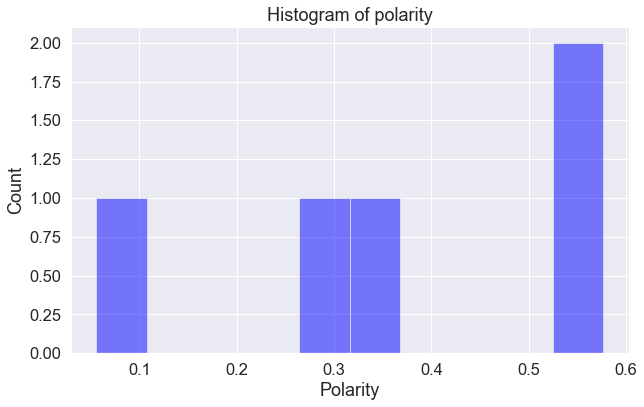

In [59]:
num_bins = 10
plt.figure(figsize=(10,6))
n, bins, patches = plt.hist(df1.polarity, num_bins, facecolor='blue', alpha=0.5)
plt.xlabel('Polarity')
plt.ylabel('Count')
plt.title('Histogram of polarity')
plt.show();

In [74]:
mylist = []
n_polarity = 0
c =0
mylist_p = []
mylist_b = []


for index, row in review.iterrows():
    if row['business_id'] == '1JF9TbJ2d5hH8xsQvvklHg':
        reviewtext = row['text']
        mylist.append(reviewtext)

In [75]:
len(mylist)

192

#### All NLP operations for reviews in 1 restaurant

In [76]:
text_dfr = pd.DataFrame(mylist)
text_dfr['word_count']= text_dfr[0].apply(lambda x: len(x.split()))
text_dfr['char_count']= text_dfr[0].apply(lambda x: len(x))
text_dfr['average_char_count']=text_dfr[0].apply(lambda x:average_word(x))
text_dfr['stop_words_count']=text_dfr[0].apply(lambda x:len([word for word in x.split() if word.lower() in stop_words]))
text_dfr['stopword_rate']=text_dfr['stop_words_count']/text_dfr['word_count']
text_dfr['lowercase']=text_dfr[0].apply(lambda x: " ".join(word.lower() for word in x.split()))
text_dfr['punctuation']=text_dfr['lowercase'].str.replace('[^\w\s]','')
text_dfr['stopwords']=text_dfr['punctuation'].apply(lambda x: " ".join(word for word in x.split()if word not in stop_words))
pd.Series(" ".join(text_dfr['stopwords']).split()).value_counts()[:30]
text_dfr['clean']=text_dfr['stopwords'].apply(lambda x: " ".join(word for word in x.split()))
text_dfr['lemmatize']=text_dfr['clean'].apply(lambda x:" ".join(Word(word).lemmatize() for word in x.split()))
text_dfr['polarity']=text_dfr['lemmatize'].apply(lambda x: TextBlob(x).sentiment[0])

    

/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:5: UnicodeWarning: Unicode equal comparison failed to convert both arguments to Unicode - interpreting them as being unequal
  """


In [78]:
text_dfr.head()

,0,word_count,char_count,average_char_count,stop_words_count,stopword_rate,lowercase,punctuation,stopwords,clean,lemmatize,polarity
0,This is place very great flavor. Server was on top of th...,93,476,4,45,0.483871,this is place very great flavor. server was on top of th...,this is place very great flavor server was on top of thi...,place great flavor server top things everything ask brou...,place great flavor server top things everything ask brou...,place great flavor server top thing everything ask broug...,0.576623
1,Driving through Phoenix on a road trip back to So Cal an...,74,393,4,34,0.459459,driving through phoenix on a road trip back to so cal an...,driving through phoenix on a road trip back to so cal an...,driving phoenix road trip back cal wanted lunch yelped s...,driving phoenix road trip back cal wanted lunch yelped s...,driving phoenix road trip back cal wanted lunch yelped s...,0.320000
2,Great place to come and eat. The prices are great and th...,40,199,4,19,0.475000,great place to come and eat. the prices are great and th...,great place to come and eat the prices are great and the...,great place come eat prices great place feel like home 4...,great place come eat prices great place feel like home 4...,great place come eat price great place feel like home 49...,0.400000
3,Best mexican food in the valley... wonderful and persona...,24,148,5,9,0.375000,best mexican food in the valley... wonderful and persona...,best mexican food in the valley wonderful and personable...,best mexican food valley wonderful personable service ca...,best mexican food valley wonderful personable service ca...,best mexican food valley wonderful personable service ca...,0.540000
4,Awesome delicious homemade food & sauces. Family friendl...,55,297,4,17,0.309091,awesome delicious homemade food & sauces. family friendl...,awesome delicious homemade food sauces family friendly ...,awesome delicious homemade food sauces family friendly p...,awesome delicious homemade food sauces family friendly p...,awesome delicious homemade food sauce family friendly pr...,0.460714


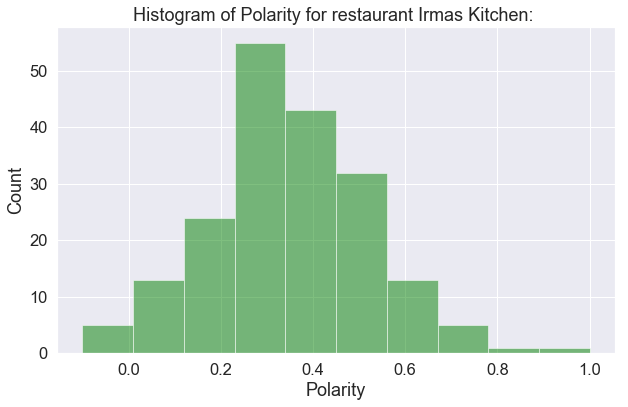

In [89]:
num_bins = 10
plt.figure(figsize=(10,6))
n, bins, patches = plt.hist(text_dfr.polarity, num_bins, facecolor='green', alpha=0.5)
plt.xlabel('Polarity')
plt.ylabel('Count')
plt.title('Histogram of Polarity for restaurant Irmas Kitchen: ')
plt.show();

In [85]:
business_phoenix[business_phoenix['business_id']=='1JF9TbJ2d5hH8xsQvvklHg']

,business_id,name,neighborhood,address,city,state,postal_code,latitude,longitude,stars,review_count,is_open,categories,restaurant
6518,1JF9TbJ2d5hH8xsQvvklHg,"""Irma's Kitchen""",NaN,"""906 N 15th Ave""",Phoenix,AZ,85007,33.457919,-112.091508,4.5,192,1,Mexican;Burgers;American (New);Restaurants;Breakfast & B...,True


#### For whole dataframe

In [61]:
review.head()

,Unnamed: 0,review_id,user_id,business_id,stars,date,text,useful,funny,cool
0,93,BF0ANB54sc_f-3_howQBCg,ssuXFjkH4neiBgwv-oN4IA,JlNeaOymdVbE6_bubqjohg,1,2014-08-09,We always go to the chevo's in chandler which is delicio...,3,0,0
1,355,z_mVLygzPn8uHp63SSCErw,MzEnYCyZlRYQRISNMXTWIg,S-oLPRdhlyL5HAknBKTUcQ,4,2017-11-30,Holy portion sizes! You get a lot of bang for your buck ...,0,0,0
2,357,xatycgntu_F_Ioyny3iflw,vaXJ7-xLrnD6FAEhUqYKwQ,iIjVO7cLD1UEmIO7G05Ujw,4,2016-06-11,Flavor was actually pretty good. Not used to eating menu...,0,0,0
3,358,Z7U7MMef6Tbj_ZbSFzLRUw,vaXJ7-xLrnD6FAEhUqYKwQ,1JF9TbJ2d5hH8xsQvvklHg,5,2016-06-18,This is place very great flavor. Server was on top of th...,1,0,0
4,360,CKiZvHfvVOY-NrFy_lT-TA,lUQzbz84E30c4L-JbqE3FQ,Ap17p-tA4Ipzy1s35DfCfg,5,2016-10-22,Had the BEST time here with my husband celebrating our a...,0,0,1


In [63]:
review['business_id'].value_counts()

pSQFynH1VxkfSmehRXlZWw    2036
VyVIneSU7XAWgMBllI6LnQ    1940
OgJ0KxwJcJ9R5bUK0ixCbg    1771
9a3DrZvpYxVs3k_qwlCNSw    1697
frCxZS7lPhEnQRJ3UY6m7A    1694
                          ... 
c4oxr_L93BQ0xy_5nsx5SQ       3
u4in1KQSQthNHcpDMjC1bw       3
s9n4QJcwjmKAtncXTq35fw       3
Xrx33FtlglUKgjR3S8Qehg       3
10d6PDujQkQmrvQMK6V0xA       3
Name: business_id, Length: 4498, dtype: int64

In [68]:
bid = list(review['business_id'].unique())
bid[:5]

['JlNeaOymdVbE6_bubqjohg',
 'S-oLPRdhlyL5HAknBKTUcQ',
 'iIjVO7cLD1UEmIO7G05Ujw',
 '1JF9TbJ2d5hH8xsQvvklHg',
 'Ap17p-tA4Ipzy1s35DfCfg']

In [70]:
len(bid)

4498

In [113]:
rev = review

In [114]:
df0 = pd.DataFrame(rev)
df0 = df0[0:0]

In [115]:
rev.shape

(344322, 10)

In [116]:
count =0
x=0
for index, row in rev.iterrows():
    if row['business_id'] == bid[0]:
        dict_df
        df0 =df0.append(row)
        x=x+1
        
x
        

205

In [117]:
df0.head()

,Unnamed: 0,review_id,user_id,business_id,stars,date,text,useful,funny,cool
0,93,BF0ANB54sc_f-3_howQBCg,ssuXFjkH4neiBgwv-oN4IA,JlNeaOymdVbE6_bubqjohg,1,2014-08-09,We always go to the chevo's in chandler which is delicio...,3,0,0
1,15312,-QgtOpsFzLHd58-Y1Ao2tA,BPKpLbR9NuWFAR9SUWpZOw,JlNeaOymdVbE6_bubqjohg,5,2014-06-29,Great grilled chicken burrito which believe it or not co...,0,0,0
2,49074,zdhN3MBABBKi-9QHAh-G1A,sg5q7rz2_7PfaN-6JnLb5g,JlNeaOymdVbE6_bubqjohg,5,2014-05-01,Everything I've had so far has been great. Not sure abou...,1,0,1
3,134570,hDA5kQatTsfKK8MZtDYPIg,I-W_at9CPQox-t0xGveymw,JlNeaOymdVbE6_bubqjohg,4,2015-11-26,Cheap prices and good food. I was able to run in and ru...,0,0,0
4,309586,ID4PLigp4LYSpV0OiNmKHA,jFTfEhwPuBsWXydhcEbqAQ,JlNeaOymdVbE6_bubqjohg,1,2014-04-24,Can't describe how bad this place is...was hoping for so...,6,1,0


In [213]:
rev = review
text_dfr= pd.DataFrame()

In [205]:
df_final

0.2531022928350443

In [209]:
rev.shape

(344322, 10)

#### Finding Polarity for every review for every restaurant

In [240]:
mylist = []
n_polarity = 0
c =0
mylist_p = []
mylist_b = []


for i in range(0,4498):
    for index, row in rev.iterrows():
        if row['business_id'] == bid[i]:
            reviewtext = row['text']
            mylist.append(reviewtext)
        
    text_dfr = pd.DataFrame(mylist)
    text_dfr['word_count']= text_dfr[0].apply(lambda x: len(x.split()))
    text_dfr['char_count']= text_dfr[0].apply(lambda x: len(x))
    text_dfr['average_char_count']=text_dfr[0].apply(lambda x:average_word(x))
    text_dfr['stop_words_count']=text_dfr[0].apply(lambda x:len([word for word in x.split() if word.lower() in stop_words]))
    text_dfr['stopword_rate']=text_dfr['stop_words_count']/text_dfr['word_count']
    text_dfr['lowercase']=text_dfr[0].apply(lambda x: " ".join(word.lower() for word in x.split()))
    text_dfr['punctuation']=text_dfr['lowercase'].str.replace('[^\w\s]','')
    text_dfr['stopwords']=text_dfr['punctuation'].apply(lambda x: " ".join(word for word in x.split()if word not in stop_words))
    pd.Series(" ".join(text_dfr['stopwords']).split()).value_counts()[:30]
    text_dfr['clean']=text_dfr['stopwords'].apply(lambda x: " ".join(word for word in x.split()))
    text_dfr['lemmatize']=text_dfr['clean'].apply(lambda x:" ".join(Word(word).lemmatize() for word in x.split()))
    text_dfr['polarity']=text_dfr['lemmatize'].apply(lambda x: TextBlob(x).sentiment[0])
    text_dfr['subjectivity']=text_dfr['lemmatize'].apply(lambda x: TextBlob(x).sentiment[1])
    n_polarity = text_dfr['polarity'].sum()/text_dfr.shape[0]
    mylist_p.append(n_polarity)
    mylist_b.append(bid[i])
    rev = rev[rev.business_id != 0]
    

In [244]:
df_final

,business_id,polarity
0,PVTfzxu7of57zo1jZwEzkg,0.316426
1,5aRyuqJZSGp1fNXHQHMLjg,0.305493
2,Qng9lEqWA9uTtm6oq2rZuw,0.305736
3,jZ8ogksrNzUmREJggc1YOQ,0.313838
4,_guNmxJd4Ep6S3pBZdAjGA,0.310389
5,XMMLRvV4IMxIGyc4H37LxA,0.312685
6,fSFzgt_QzJRUN0qNzTAwig,0.308374
7,6MhY_9EkUkKCvvN8rzXZzg,0.303815
8,US0ZdkGe5Fv1lLczbKYJoA,0.303252


In [245]:
dfnew = pd.DataFrame(columns = {'text'})

In [262]:
rev.shape

(344322, 10)

In [301]:
dfnew.head()

,0
0,Probably the best customer service I've ever had in Phoe...
1,UUGGHHH. You yelp-trolls with broken taste buds got me a...
2,"Always fresh sushi, quick lunch service and smiling staf..."
3,"Quick service, amazing sushi rolls, very amiable staff, ..."
4,By far the best sushi I have had in Phoenix so far. The...


In [990]:
mylist_p2 =[]
mylist_b2 =[]

In [973]:
mylist =[]

for j in range(2210,2220):
    for i in rev.index:
        val = rev.get_value(i,'business_id')
        if val ==bid[j]:
            reviewtext = rev.get_value(i,'text')
            mylist.append(reviewtext)
    text_dfr = pd.DataFrame(mylist)
    text_dfr['lowercase']=text_dfr[0].apply(lambda x: " ".join(word.lower() for word in x.split()))
    text_dfr['punctuation']=text_dfr['lowercase'].str.replace('[^\w\s]','')
    text_dfr['stopwords']=text_dfr['punctuation'].apply(lambda x: " ".join(word for word in x.split()if word not in stop_words))
    pd.Series(" ".join(text_dfr['stopwords']).split()).value_counts()[:30]
    text_dfr['clean']=text_dfr['stopwords'].apply(lambda x: " ".join(word for word in x.split()))
    text_dfr['lemmatize']=text_dfr['clean'].apply(lambda x:" ".join(Word(word).lemmatize() for word in x.split()))
    text_dfr['polarity']=text_dfr['lemmatize'].apply(lambda x: TextBlob(x).sentiment[0])
    n_polarity = text_dfr['polarity'].sum()/text_dfr.shape[0]
    mylist_p2.append(n_polarity)
    mylist_b2.append(bid[j])
                

In [1201]:
final_b = final_b+ mylist_b2

In [1202]:
df_nlp2 = pd.DataFrame( {'business_id': final_b,
     'polarity': final_p
    })

In [1203]:
df_nlp2

,business_id,polarity
0,JlNeaOymdVbE6_bubqjohg,0.253102
1,S-oLPRdhlyL5HAknBKTUcQ,0.328307
2,iIjVO7cLD1UEmIO7G05Ujw,0.310370
3,1JF9TbJ2d5hH8xsQvvklHg,0.315170
4,Ap17p-tA4Ipzy1s35DfCfg,0.329253
...,...,...
4977,ZZn2sUiOBJZqPZyD8Gkf_g,0.176835
4978,japzjLMfmqsGszf2CG1org,0.178263
4979,SuwhEmo9wE4Tis4i3Sg4Kw,0.176296
4980,IespLu0QdmfmujunHYxVMg,0.176626


In [1204]:
df_nlp = df_nlp2.drop_duplicates( keep = "first") 
df_nlp

,business_id,polarity
0,JlNeaOymdVbE6_bubqjohg,0.253102
1,S-oLPRdhlyL5HAknBKTUcQ,0.328307
2,iIjVO7cLD1UEmIO7G05Ujw,0.310370
3,1JF9TbJ2d5hH8xsQvvklHg,0.315170
4,Ap17p-tA4Ipzy1s35DfCfg,0.329253
...,...,...
4977,ZZn2sUiOBJZqPZyD8Gkf_g,0.176835
4978,japzjLMfmqsGszf2CG1org,0.178263
4979,SuwhEmo9wE4Tis4i3Sg4Kw,0.176296
4980,IespLu0QdmfmujunHYxVMg,0.176626


In [1206]:
df_nlp.to_csv ('nlpfinal.csv', index = None, header=True)

#### Merging final NLP results with Phoenix data frame

In [1215]:
df1 = pd.read_csv("nlpfinal.csv")

In [1219]:
df1.shape

(4498, 2)

In [1220]:
df1.head()

,business_id,polarity
0,JlNeaOymdVbE6_bubqjohg,0.253102
1,S-oLPRdhlyL5HAknBKTUcQ,0.328307
2,iIjVO7cLD1UEmIO7G05Ujw,0.310370
3,1JF9TbJ2d5hH8xsQvvklHg,0.315170
4,Ap17p-tA4Ipzy1s35DfCfg,0.329253


In [1221]:
df2 = pd.read_csv("Pheonix_Final.csv")

In [1222]:
df2.shape

(4300, 34)

In [1223]:
df2.head()

,Unnamed: 0,business_id,Shortlisted?,ProjectCategory,name,neighborhood,address,city,state,postal_code,...,HappyHour,RECOMMENDATION,DogsAllowed,SPECIAL_FOOD,AgesAllowed,Unnamed: 0.1,weekday,weekend,averghour,if_Chain
0,0,rDMptJYWtnMhpQu_rRXHng,Yes,Burger,"""McDonald's""",NaN,"""719 E Thunderbird Rd""",Phoenix,AZ,85022,...,0,0,1,0.0,0,3253,0.0,0.0,0.000000,1
1,1,1WBkAuQg81kokZIPMpn9Zg,Yes,Burger,"""Charr An American Burger Bar""",NaN,"""777 E Thunderbird Rd, Ste 107""",Phoenix,AZ,85022,...,0,0,0,0.0,0,3229,56.0,22.0,11.142857,1
2,2,iPa__LOhse-hobC2Xmp-Kw,Yes,Burger,"""McDonald's""",NaN,"""1635 E Camelback Rd""",Phoenix,AZ,85016,...,0,0,1,0.0,0,2461,90.0,36.0,18.000000,1
3,3,QkG3KUXwqZBW18A9k1xqCA,Yes,Other,"""Red Lobster""",NaN,"""2810 North 75th Ave""",Phoenix,AZ,85035,...,0,0,0,0.0,0,3022,56.0,23.0,11.285714,0
4,4,5XejqzaFmtkZMstJS5Iy-w,Yes,Sandwiches,"""D'Lish Cafe""",NaN,"""503 W Thomas Rd""",Phoenix,AZ,85013,...,0,0,0,0.0,0,623,25.0,10.0,5.000000,0


In [1224]:
df3 = pd.merge(df2, df1, on='business_id', how='left')

In [1225]:
df3.head()

,Unnamed: 0,business_id,Shortlisted?,ProjectCategory,name,neighborhood,address,city,state,postal_code,...,RECOMMENDATION,DogsAllowed,SPECIAL_FOOD,AgesAllowed,Unnamed: 0.1,weekday,weekend,averghour,if_Chain,polarity
0,0,rDMptJYWtnMhpQu_rRXHng,Yes,Burger,"""McDonald's""",NaN,"""719 E Thunderbird Rd""",Phoenix,AZ,85022,...,0,1,0.0,0,3253,0.0,0.0,0.000000,1,0.152415
1,1,1WBkAuQg81kokZIPMpn9Zg,Yes,Burger,"""Charr An American Burger Bar""",NaN,"""777 E Thunderbird Rd, Ste 107""",Phoenix,AZ,85022,...,0,0,0.0,0,3229,56.0,22.0,11.142857,1,0.233437
2,2,iPa__LOhse-hobC2Xmp-Kw,Yes,Burger,"""McDonald's""",NaN,"""1635 E Camelback Rd""",Phoenix,AZ,85016,...,0,1,0.0,0,2461,90.0,36.0,18.000000,1,0.104785
3,3,QkG3KUXwqZBW18A9k1xqCA,Yes,Other,"""Red Lobster""",NaN,"""2810 North 75th Ave""",Phoenix,AZ,85035,...,0,0,0.0,0,3022,56.0,23.0,11.285714,0,0.198911
4,4,5XejqzaFmtkZMstJS5Iy-w,Yes,Sandwiches,"""D'Lish Cafe""",NaN,"""503 W Thomas Rd""",Phoenix,AZ,85013,...,0,0,0.0,0,623,25.0,10.0,5.000000,0,0.201747


In [1227]:
df3.shape

(4300, 35)

In [1232]:
df3.to_csv ('Pheonix_Final_v2.csv', index = None, header=True)